C:\Users\LeoMa\AppData\Local\Temp\ipykernel_60232\239167830.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df1 = yf.download(tickers_sel[0], start= '2017-01-01', end= '2025-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\LeoMa\AppData\Local\Temp\ipykernel_60232\239167830.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2 = yf.download(tickers_sel[1], start= '2017-01-01', end= '2025-01-01')
[*********************100%***********************]  1 of 1 completed


{'address1': '1400 Smith Street', 'city': 'Houston', 'state': 'TX', 'zip': '77002-7327', 'country': 'United States', 'phone': '832 854 1000', 'website': 'https://www.chevron.com', 'industry': 'Oil & Gas Integrated', 'industryKey': 'oil-gas-integrated', 'industryDisp': 'Oil & Gas Integrated', 'sector': 'Energy', 'sectorKey': 'energy', 'sectorDisp': 'Energy', 'longBusinessSummary': 'Chevron Corporation, through its subsidiaries, engages in the integrated energy and chemicals operations in the United States and internationally. The company operates in two segments, Upstream and Downstream. The Upstream segment engages in the exploration, development, production, and transportation of crude oil and natural gas; liquefaction, transportation, and regasification of liquefied natural gas; transporting crude oil through pipelines; processing, transporting, storage, and marketing of natural gas; and carbon capture and storage, as well as a gas-to-liquids plant. The Downstream segment refines cru

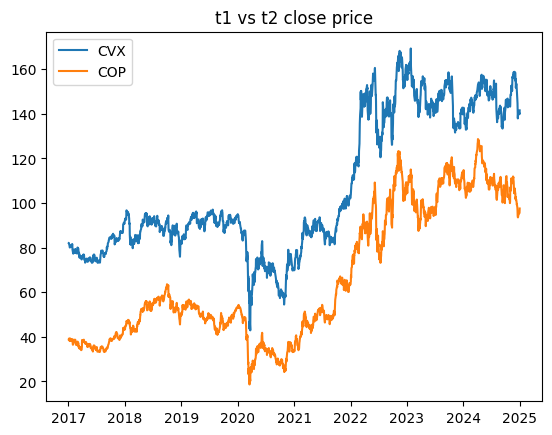

0.021275884784715992


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from itertools import combinations
from statsmodels.tsa.stattools import coint

tickers_sel = ['CVX','COP']

df1 = yf.download(tickers_sel[0], start= '2017-01-01', end= '2025-01-01')

df2 = yf.download(tickers_sel[1], start= '2017-01-01', end= '2025-01-01')

ticker1 = yf.Ticker(tickers_sel[0])
info1 = ticker1.info

ticker2 = yf.Ticker(tickers_sel[1])
info2 = ticker2.info

print(info1)
print(info2)

data1 = df1['Close']
data2 = df2['Close']

prices = pd.concat([data1, data2], axis = 1)
prices.columns = tickers_sel

print (prices.head())
plt.plot(data1, label = tickers_sel[0])
plt.plot(data2, label = tickers_sel[1])
plt.legend()
plt.title('t1 vs t2 close price')
plt.show()


score, p_value, _ = coint(prices[tickers_sel[0]], prices[tickers_sel[1]])

print (p_value)


0.9299898414583353
Date
2017-01-03   -37.445409
2017-01-04   -37.065118
2017-01-05   -36.850063
2017-01-06   -36.691637
2017-01-09   -36.873422
                ...    
2024-12-24   -35.194777
2024-12-26   -35.538380
2024-12-27   -35.527055
2024-12-30   -34.514747
2024-12-31   -34.077319
Length: 2012, dtype: float64
Date
2017-01-03   -0.716793
2017-01-04   -0.659607
2017-01-05   -0.627268
2017-01-06   -0.603445
2017-01-09   -0.630781
                ...   
2024-12-24   -0.378358
2024-12-26   -0.430026
2024-12-27   -0.428323
2024-12-30   -0.276099
2024-12-31   -0.210322
Length: 2012, dtype: float64


C:\Users\LeoMa\AppData\Local\Temp\ipykernel_60232\2724345237.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]


<function matplotlib.pyplot.show(close=None, block=None)>

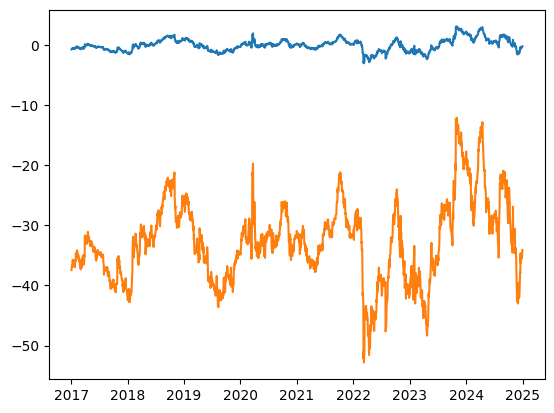

In [7]:
import statsmodels.api as sm
import math

y = prices[tickers_sel[1]]
x = prices[tickers_sel[0]]

x_const = sm.add_constant(x)

model = sm.OLS(y, x_const).fit()

hedge_ratio = model.params[1]

spread = y - hedge_ratio * x

z_score = (spread - spread.mean())/spread.std()

print(hedge_ratio)

print(spread)

print(z_score)

plt.plot(z_score)
plt.plot(spread)

plt.show

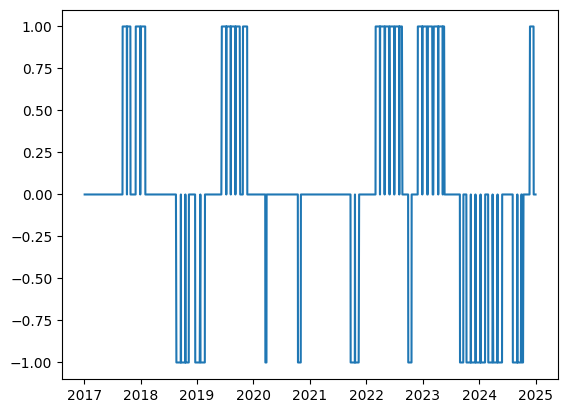

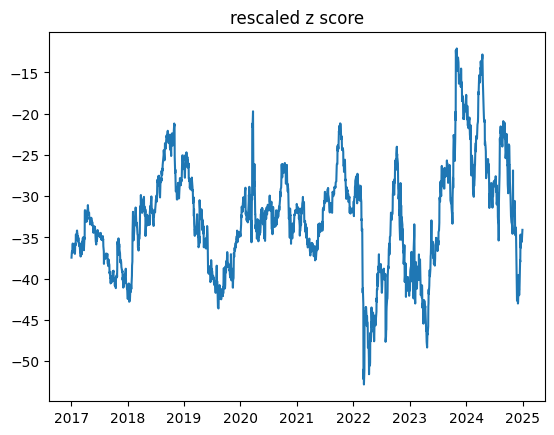

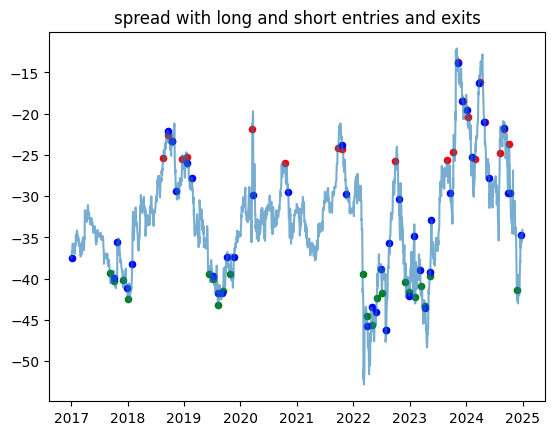

In [18]:
positions = []
holding = 0
max_hold = 20
curr_position = 0

for i in range(len(z_score)):

    z = z_score.iloc[i]

    if curr_position == 0:
        if z > 1.0:
            curr_position = -1

        elif z < -1.0:
            curr_position = 1
    
    else:
        holding += 1

        if (-0.5 < z < 0.5) or holding >= max_hold:
            curr_position = 0
            holding = 0

    positions.append(curr_position)


positions = pd.Series(positions, index = z_score.index).fillna(0)

plt.plot(positions)

plt.show()

rescaled_z = z_score * spread.std() + spread.mean()


plt.plot(rescaled_z.index, rescaled_z)
plt.title('rescaled z score')
plt.show()

plt.plot(spread.index, spread, alpha = 0.6)

long = (positions.shift(1) == 0) & (positions == 1)
short = (positions.shift(1) == 0) & (positions == -1)
exit = (positions.shift(1) != 0) & (positions == 0)

plt.scatter(spread.index[long], spread[long], color = 'green', s=20)
plt.scatter(spread.index[short], spread[short], color = 'red', s=20)
plt.scatter(spread.index[exit], spread[exit], color = 'blue', s=20)


plt.title('spread with long and short entries and exits')

plt.show()



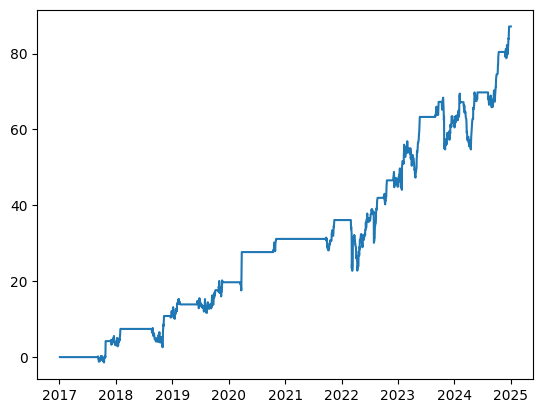

87.12828185649957


In [22]:


spread_return = spread.diff()

positions_shifted = positions.shift(1)

PnL = positions_shifted * spread_return

cumulative_PnL = PnL.cumsum()

plt.plot(cumulative_PnL)

plt.show()

print(cumulative_PnL.max())